## Анализ полученных данных

Статистика по вакансиям для удобного отображения вынесена в отдельную тетрадку.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

from scipy.sparse import hstack
from sklearn.linear_model import Ridge
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

sns.set()

### Загрузка данных

In [2]:
df = pd.read_csv('hh_data.csv')
df[df['Salary']][0:7]

,Id,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description
0,32740996,DataFork,Data Engineering Team Lead (Python / C++),True,261000.0,348000.0,От 3 до 6 лет,Полный день,"['C++', 'Teamleading', 'ETL', 'Python']","Амбициозный проект ищет бывалого лида, способн..."
2,32876723,Admitad,Senior/Lead Python Developer,True,180000.0,NaN,От 3 до 6 лет,Гибкий график,"['docker', 'Flask', 'RabbitMQ', 'PostgreSQL', ...",Admitad - это международная продуктовая компан...
3,32719532,IVIDEON,Senior Python developer (Cloud Services),True,180000.0,230000.0,От 3 до 6 лет,Полный день,"['Python', 'docker', 'SOA', 'tornado', 'C++', ...",Ivideon — это самый популярный в мире облачный...
4,33111826,Web Interactive World,Разработчик Python Backend,True,150000.0,NaN,От 3 до 6 лет,Полный день,"['Искусственный интеллект', 'Big Data', 'Data ...",&quot;Веб Интерактив Ворлд&quot; занимается ра...
7,32144172,HeadHunter,"Senior Front-end Developer (JavaScript, React)",True,174000.0,NaN,От 3 до 6 лет,Полный день,"['JavaScript', 'React', 'HTML', 'CSS', 'Front-...",HeadHunter ищет опытного человека в технически...
9,32954824,Эверпоинт,Разработчик Python,True,100000.0,180000.0,От 3 до 6 лет,Полный день,"['Python', 'Django Framework', 'ML']",⚡К себе в команду срочно ищем разработчика Pyt...
12,33184272,Realforce AG,Senior Back-End Developer (PHP),True,182700.0,217500.0,Более 6 лет,Удаленная работа,"['Symfony', 'PHP', 'Английский язык', 'MySQL',...",JOB DESCRIPTION We are looking for an experien...


### Количество вакансий

In [3]:
print('Number of vacancies: {}'.format(df['Id'].count()))

Number of vacancies: 812


### Вакансия с максимальной зарплатой

In [4]:
df.iloc[df[['From', 'To']].idxmax()]

,Id,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description
20,32702965,Anchous Drive Recruitment,Senior Backend разработчик Python/C++ в Сан-Фр...,True,300000.0,NaN,Более 6 лет,Полный день,"['Python', 'MongoDB', 'Redis', 'Git', 'Agile P...","Привет!Ты пишешь на Python или С++, работаешь ..."
616,31975374,LATOKEN,Head of Trading and Liquidity / Глава трейдинг...,True,300000.0,500000.0,От 3 до 6 лет,Полный день,"['Investment Analysis', 'Investment Banking', ...",LATOKEN is a top-10 digital assets exchange le...


### Вакансия с минимальной зарплатой

In [5]:
df.iloc[df[['From', 'To']].idxmin()]

,Id,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description
465,24344824,Группа компаний SRG,Junior Java Developer,True,40000.0,80000.0,Нет опыта,Полный день,[],Компания SRG является одним из лидеров на рынк...
474,30325840,SAPRUN,Стажер/бизнес-аналитик SAP,True,NaN,30450.0,Нет опыта,Полный день,"['SAP ERP', 'Аналитика', 'Разработка бизнес пр...",Требования: Опыт внедрения/разработки/поддерж...


### Статистика по зарплатам

Здесь отображается количество вакансий с указанными зарплатами "От" и "До", производится подсчет таких вакансий, а также некоторые свойства: среднее, медиана, минимальное и максимальное значение.

In [6]:
df_stat = df[['From', 'To']].describe().applymap(np.int32)
df_stat.iloc[list(range(4))+[-1]]

,From,To
count,135,82
mean,154314,190481
std,57165,76904
min,40000,30450
max,300000,500000


### График зарплат

Приводятся графики и распределения зарплат "От" и "До"

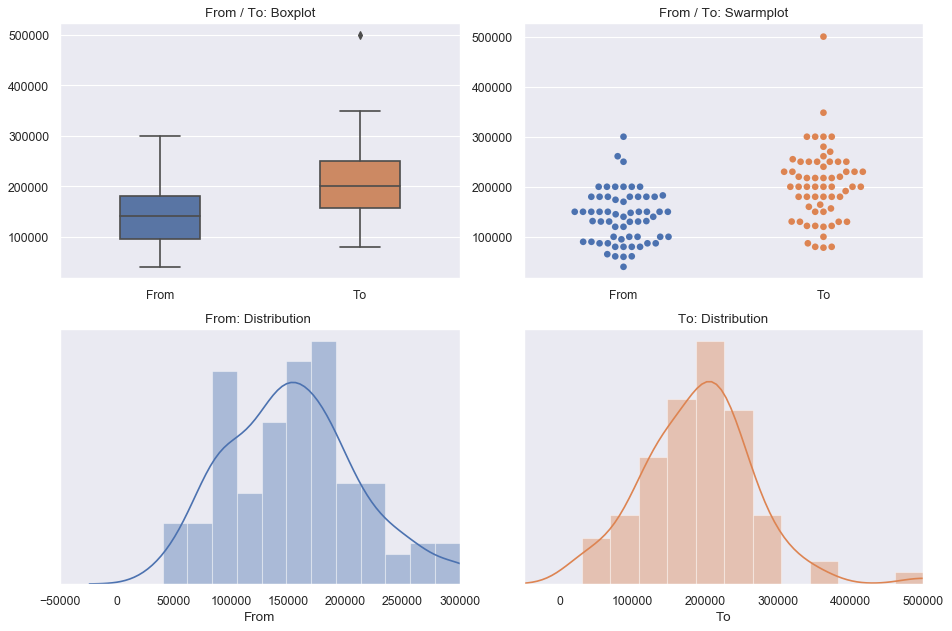

In [7]:
fz = plt.figure('Salary plots', figsize=(12, 8), dpi=80)

fz.add_subplot(2, 2, 1)
plt.title('From / To: Boxplot')
sns.boxplot(data=df[['From', 'To']].dropna(), width=0.4)

fz.add_subplot(2, 2, 2)
plt.title('From / To: Swarmplot')
sns.swarmplot(data=df[['From', 'To']].dropna(), size=6)

fz.add_subplot(2, 2, 3)
plt.title('From: Distribution ')
sns.distplot(df['From'].dropna(), bins=12, color='C0')
plt.grid(False)
plt.xlim([-50000, df['From'].max()])
plt.yticks([], [])

fz.add_subplot(2, 2, 4)
plt.title('To: Distribution')
sns.distplot(df['To'].dropna(), bins=12, color='C1')
plt.grid(False)
plt.xlim([-50000, df['To'].max()])
plt.yticks([], [])
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

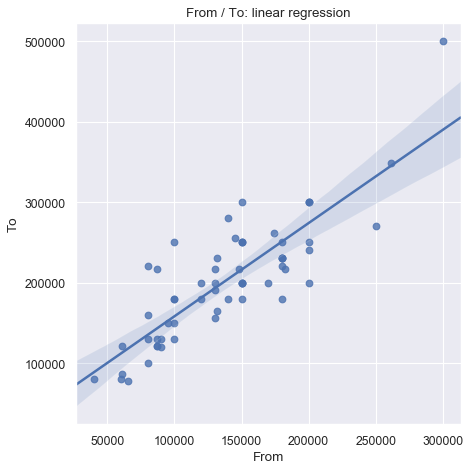

In [8]:
plt.figure('Linear regression')
fz = plt.figure(figsize=(6, 6), dpi=80)
fz.add_subplot(1, 1, 1)
plt.title('From / To: linear regression')
sns.regplot(x=df['From'], y=df['To'])
plt.tight_layout()

### Усредненная статистика

Поскольку не у всех вакансий указаны поля "От" и "До", производится расчет средней зарплаты, а на основании этих данных рассчитывается статистика.

In [9]:
comb_from_to = np.nanmean(df[df['Salary']][['From', 'To']].to_numpy(), axis=1)
print('Average statistics (average filter for "From"-"To" parameters):')
print('Mim    : %d' % np.min(comb_from_to))
print('Max    : %d' % np.max(comb_from_to))
print('Mean   : %d' % np.mean(comb_from_to))
print('Median : %d' % np.median(comb_from_to))

Average statistics (average filter for "From"-"To" parameters):
Mim    : 30450
Max    : 400000
Mean   : 166767
Median : 165150


### Список часто используемых слов

В этом разделе производится поиск наиболее употребляемых слов для параметра **Ключевые навыки**. Результа функции - список в порядке убывания.

In [10]:
def most_keys():
    # Collect keys from dataframe
    keys_df = df['Keys'].to_list()
    
    # Create a list of keys for all vacancies
    lst_keys = []
    for keys_elem in keys_df:
        for el in keys_elem[1:-1].split(', '):
            if el != '':
                lst_keys.append(re.sub('\'', '', el.lower()))

    # Unique keys and their counter
    set_keys = set(lst_keys)
    # Dict: {Key: Count}
    dct_keys = {el:lst_keys.count(el) for el in set_keys}
    # Sorted dict
    srt_keys = dict(sorted(dct_keys.items(), key=lambda x: x[1], reverse=True))
    # Return pandas series
    return pd.Series(srt_keys, name='Keys')

In [11]:
ds_keys = most_keys()

print(ds_keys[:15])

python              263
linux               114
sql                 111
git                  72
c++                  67
postgresql           63
javascript           58
java                 47
django framework     46
mysql                35
docker               31
bash                 29
redis                25
ms sql               23
big data             23
Name: Keys, dtype: int64


### Описание вакансий

Поиск наиболее употребляемых слов для параметра **Описание вакансий**.  
Результат функции - список наиболее часто употребляемых слов (на английском языке) в порядке убывания.

In [12]:
def most_words():
    # Collect keys from dataframe
    words_df = df['Description'].to_list()
    # Long string - combine descriptions
    words_ls = ' '.join([re.sub(' +', ' ', re.sub('\d+', '', el.strip().lower())) for el in words_df])
    # Find all words
    words_re = re.findall('[a-zA-Z]+', words_ls)
    # Filter words with length < 3
    words_l2 = [el for el in words_re if len(el) > 2]
    # Unique words
    words_st = set(words_l2)
    # Remove 'stop words'
    stop_words = set(stopwords.words('english'))
    # XOR for dictionary
    words_st ^= stop_words
    # Dictionary - {Word: Counter}
    words_cnt = {el : words_l2.count(el) for el in words_st}
    # Pandas series
    return pd.Series(dict(sorted(words_cnt.items(), key=lambda x: x[1], reverse=True)))

In [13]:
ds_words = most_words()

print(ds_words.head(15))

python         1053
data            634
sql             460
quot            424
experience      418
linux           375
java            327
team            263
development     237
learning        236
git             233
skills          217
postgresql      215
business        214
docker          210
dtype: int64


### Предсказание зарплаты

На этом этапе происходит предсказание зарплаты для вакансий, у которых она не указана. Ниже пошагово представлен алгоритм.
___

**Шаг 1: Предобработка данных**:
- Удаление NaN значений из таблицы,
- Поиск среднего значение для From / To столбцов,
- Замена столбцов зарплаты на усредненое значение

In [14]:
# Replace NaN from Salary into From / To fields,
# Find mean values for each elemen and drop NaNs
df_num = df[df['From'].notna() | df['From'].notna()]
df_avg = df_num[['From', 'To']].mean(axis=1)
df_num = df_num.drop(['Salary', 'From', 'To'], axis=1)
df_num.insert(3, 'Average', df_avg)

**Шаг 2: Подготовка модели**:
- Формирование вектора признаков из столбца ключевых навыков со списком исключений `stop_words`
- Поиск наиболее часто используемых слов в ключевых навыках
- One-Hot кодирование признаков таблицы
- Объединение в матрицу "объекты-признаки"

In [15]:
def text_replace(text) -> pd.Series:
    return text.str.lower().replace("[^a-zA-Z]\bqout\b|\bamp\b", " ", regex=True)

# Set TF-IDF features
min_df = 5 # ignore terms w/ frequency < than threshold
tf_idf = TfidfVectorizer(min_df=min_df, stop_words='english')

# Training set
X_train_text = tf_idf.fit_transform(text_replace(df_num['Keys']))
# Dict: {key: counter}
# print(pd.Series(tf_idf.vocabulary_)[:10])

# Print top words used in keys
idx = np.ravel(X_train_text.sum(axis=0).argsort(axis=1))[::-1][:7]
top_words = np.array(tf_idf.get_feature_names())[idx].tolist()
print('Top words used in keys: {}'. format(top_words))

# One-hot-encoding for data frame features
dct_enc = DictVectorizer()
X_train_cat = dct_enc.fit_transform(df_num[['Experience', 'Name']].to_dict('Records'))

# Stack vectors
X_train = hstack([X_train_text, X_train_cat])

Top words used in keys: ['python', 'linux', 'postgresql', 'sql', 'git', 'javascript', 'django']


**Шаг 3: Обучение модели**

In [16]:
# Train model
y_train = df_num['Average']
model = Ridge(alpha=1, random_state=255)
model.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=255, solver='auto', tol=0.001)

**Шаг 4: Применение к тестовым данным**

In [17]:
# Frame with NaNs
x_test = df[df['From'].isna() & df['To'].isna()]

# Test vectors
X_test_text = tf_idf.transform(text_replace(x_test['Description']))
X_test_cat = dct_enc.transform(x_test[['Experience', 'Name']].to_dict('Records'))
X_test = hstack([X_test_text, X_test_cat])

# Prediction model - result
y_test = model.predict(X_test)

print('Average salary forvacancies with NaN is {}'.format(y_test.mean(dtype=int)))

Average salary forvacancies with NaN is 171618


**Шаг 5: Замена отсутствующих зарплат на предсказанные значения**

In [18]:
df_tst = x_test.drop(['Salary', 'From', 'To'], axis=1)
df_tst.insert(3, 'Average', y_test.astype(int))
df_tst.head(10)

,Id,Employer,Name,Average,Experience,Schedule,Keys,Description
1,33070408,Руформ,Senior Python developer,141269,От 1 года до 3 лет,Полный день,"['Python', 'Django Framework', 'Redis', 'SQL']",В команду Ruform ищем Python разработчика. От ...
5,32690988,BestDoctor,Python-Разработчик/Python Developer,194905,От 1 года до 3 лет,Гибкий график,"['Python', 'Django Framework', 'PostgreSQL', '...","Кто мы BestDoctor — это медицинская компания, ..."
6,33195860,Bet.tech,"Python Developer (Middle / Senior, Riga)",174944,От 3 до 6 лет,Полный день,[],Что нужно будет делать: писать web-сервисы и ...
8,33181965,Омникомм Технологии,Senior developer / Team Lead (Python),187076,От 3 до 6 лет,Полный день,[],Мы разрабатываем стартап внутри Enterprise сис...
10,32600089,SUNLIGHT,Python разработчик,155526,От 3 до 6 лет,Полный день,[],SUNLIGHT - крупнейшая ювелирная сеть России. Н...
11,33149111,Luxoft,Senior Python Developer,190609,От 3 до 6 лет,Полный день,[],Project Description: The project is for one of...
15,29422653,Центр недвижимости от Сбербанка,Senior Python Developer,169424,От 3 до 6 лет,Полный день,[],Мы - это продуктовая IT компания по созданию h...
17,32950333,Cloud Linux,Junior Python Developer for Imunify Security (...,184985,От 1 года до 3 лет,Гибкий график,"['Linux', 'JavaScript', 'PHP', 'Python', 'Git'...",We are looking for talented Junior Python Deve...
18,32691158,BestDoctor,Старший Python-разработчик/Senior Python devel...,183106,От 3 до 6 лет,Гибкий график,"['Python', 'Django Framework', 'Git', 'Postgre...","Кто мы BestDoctor — это медицинская компания, ..."
25,32983824,Group-IB,Программист Python,114285,Нет опыта,Полный день,"['Python', 'Linux', 'C++', 'SQL', 'TCP/IP']",Обязанности Низкоуровневая обработка бинарных...


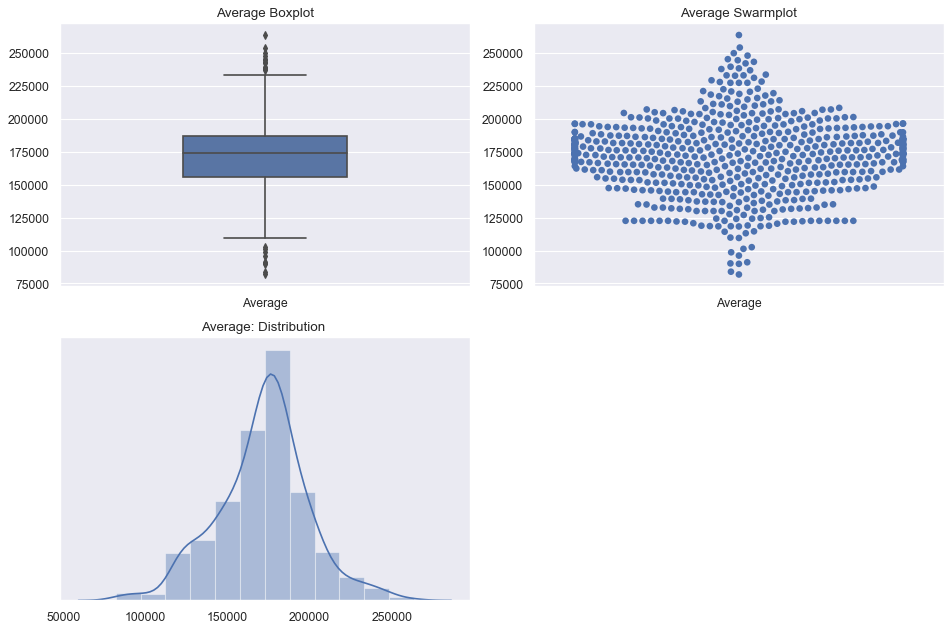

In [19]:
fp = plt.figure('Predicted salaries', figsize=(12, 8), dpi=80)
fp.add_subplot(2, 2, 1)
plt.title('Average Boxplot')
sns.boxplot(data=df_tst[['Average']], width=0.4)

fp.add_subplot(2, 2, 2)
plt.title('Average Swarmplot')
sns.swarmplot(data=df_tst[['Average']].dropna(), size=6)

fp.add_subplot(2, 2, 3)
plt.title('Average: Distribution ')
sns.distplot(df_tst[['Average']].dropna(), bins=12)
plt.grid(False)
plt.yticks([], [])
plt.tight_layout()